In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df.columns

Index(['Symbol', 'Date', 'Close', 'Profit', 'Range', 'Change', 'Volume'], dtype='object')

In [30]:
df = pd.read_csv('stocks/total_clean.csv' , index_col = 'Unnamed: 0')
df.columns = ['Symbol', 'Date', 'Close', 'Profit', 'Range', 'Change', 'Volume']
df.head()

,Symbol,Date,Close,Profit,Range,Change,Volume
12365,MMM,2019-01-08,180.100610,0.692993,4.529999,0.417354,2479800.0
12366,MMM,2019-01-09,180.356924,1.281570,2.559998,0.322417,2163600.0
12367,MMM,2019-01-10,182.225162,2.515656,4.410004,0.671480,1939300.0
12368,MMM,2019-01-11,182.394144,1.196152,1.830002,-0.723149,2359900.0
12369,MMM,2019-01-14,182.639059,1.158142,3.029999,-0.020835,1914400.0


### Check for Null values and remove them

In [31]:
df[df.isna().any(axis=1)]

,Symbol,Date,Close,Profit,Range,Change,Volume


In [32]:
df.dropna(inplace = True)

### Looking for symbols with the price range less than our period (2015-01-01 to 2020-04-01)
**After finding the incompelete symbols, we will remove them**

In [33]:
days_cnt = df[['Date', 'Symbol']].groupby(['Symbol']).count()
days_cnt = days_cnt.reset_index()
imperfect_symbols = days_cnt[days_cnt['Date'] < 310]['Symbol'].tolist()


In [34]:
df = df[df['Symbol'].apply(lambda x:x not in imperfect_symbols)]

### Number of Unique Symbols

In [35]:
symbols  = df['Symbol'].unique()
print(len(symbols))

493


### Check stocks price range over the period

In [36]:
df.describe()

,Close,Profit,Range,Change,Volume
count,152830.000000,152830.000000,152830.000000,152830.000000,1.528300e+05
mean,128.891772,22.661131,3.007083,-0.074171,4.265192e+06
std,222.027285,60.528956,7.236799,2.809257,8.414314e+06
min,3.502000,-569.459961,0.000000,-116.753931,0.000000e+00
25%,47.600880,3.082842,0.849998,-0.814667,1.012625e+06
50%,83.801050,11.273210,1.530006,0.111364,1.959250e+06
75%,141.584280,26.519989,2.970001,0.950853,4.279500e+06
max,3997.697949,1616.949951,657.209961,40.468977,4.010487e+08


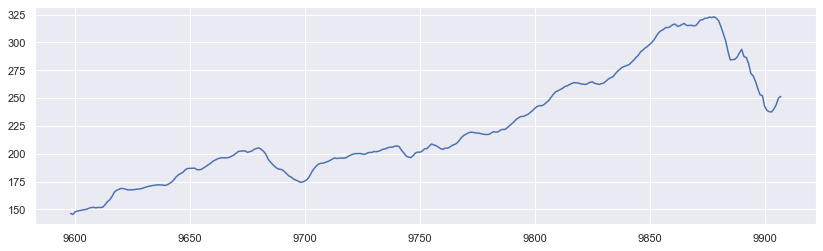

In [37]:
sns.set(rc={'figure.figsize':(14, 4)})
df[df['Symbol'] == 'AAPL']['Close'].plot()
plt.show()